# 2 - Free Energy Calculation Experiments
*By Marcus Schwarting*

In this notebook, we will adjust various parameters to analyze their effect on the Helmholtz free energy across a reaction coordinate. We will cover:
- Double- and triple-well potentials
- Changes in well height
- Changes in well width
- Changes in both well height and well width simultaneously

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uwham_umbrella import *
%matplotlib inline

### Comparing Double- and Triple-Well Potentials

In [2]:
kB = 1.38064852E-2 # zJ/K
T=298 #Kelvin
run_calc_double = UWHAM_FreeEnergy(lower_range=-1.0,upper_range=1.0,well_type='double',n_bins=100,\
                 well_width=1,well_height=kB*T,friction_const=0.1,temperature=T,timestep_size=1e-4)
run_calc_double.run_umbrella_sim_full(1000)
free_energy_double = run_calc_double.helmholtz_energy(-1.0,1.0,print_modulus=10)

Difference to convergence (lower limit 0.1): 92.8522799014891
Difference to convergence (lower limit 0.1): 1.4819774198549733
Difference to convergence (lower limit 0.1): 0.6856882904786914
Difference to convergence (lower limit 0.1): 0.3279580438526013
Difference to convergence (lower limit 0.1): 0.17423467777239002
Difference to convergence (lower limit 0.1): 0.1050244680433525


In [3]:
kB = 1.38064852E-2 # zJ/K
T=298 #Kelvin
run_calc_triple = UWHAM_FreeEnergy(lower_range=-1.0,upper_range=1.0,well_type='triple',n_bins=100,\
                 well_width=1,well_height=kB*T,friction_const=0.1,temperature=T,timestep_size=1e-4)
run_calc_triple.run_umbrella_sim_full(1000)
free_energy_triple = run_calc_triple.helmholtz_energy(-1.0,1.0,print_modulus=10)

Difference to convergence (lower limit 0.1): 205.7705169044231
Difference to convergence (lower limit 0.1): 3.7260277292593584
Difference to convergence (lower limit 0.1): 1.4686388459966029
Difference to convergence (lower limit 0.1): 1.0804375924975866
Difference to convergence (lower limit 0.1): 0.6881741195998461
Difference to convergence (lower limit 0.1): 0.44832234438244356
Difference to convergence (lower limit 0.1): 0.3377240510952315
Difference to convergence (lower limit 0.1): 0.16522259333165742
Difference to convergence (lower limit 0.1): 0.09803744783462726


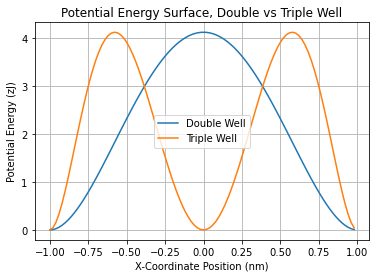

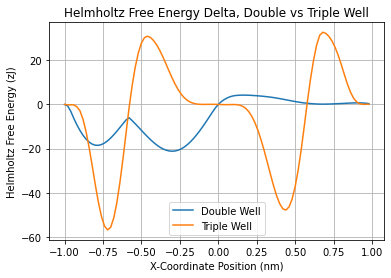

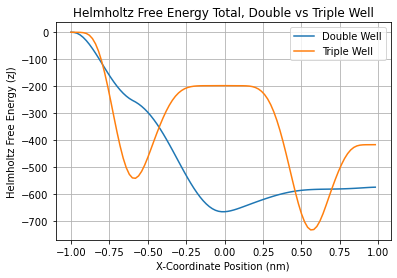

In [11]:
plt.figure()
plt.plot(run_calc_double.x_range[:-1],\
         np.array([run_calc_double.double_well_potential(x) \
                   for x in run_calc_double.x_range[:-1]]),label='Double Well')
plt.plot(run_calc_triple.x_range[:-1],\
         np.array([run_calc_triple.triple_well_potential(x) \
                   for x in run_calc_triple.x_range[:-1]]),label='Triple Well')
plt.title('Potential Energy Surface, Double vs Triple Well')
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Potential Energy (zJ)')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(run_calc_double.x_range[:-1],free_energy_double,label='Double Well')
plt.plot(run_calc_triple.x_range[:-1],free_energy_triple,label='Triple Well')
plt.title('Helmholtz Free Energy Delta, Double vs Triple Well')
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Helmholtz Free Energy (zJ)')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(run_calc_double.x_range[:-1],np.cumsum(free_energy_double),label='Double Well')
plt.plot(run_calc_triple.x_range[:-1],np.cumsum(free_energy_triple),label='Triple Well')
plt.title('Helmholtz Free Energy Total, Double vs Triple Well')
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Helmholtz Free Energy (zJ)')
plt.legend()
plt.grid()
plt.show()

### Varying Well Width With Corresponding Reaction Coordinates

In [19]:
#TEST DISTANCE BETWEEN WELLS
double_dict = {}
triple_dict = {}
for width in np.linspace(0.5,3,6):
    run_calc_double = UWHAM_FreeEnergy(lower_range=-width,upper_range=width,\
                                well_type='double',n_bins=100,\
                                well_width=width,well_height=kB*T,\
                                friction_const=0.1,temperature=T,timestep_size=1e-4)
    run_calc_double.run_umbrella_sim_full(1000)
    free_energy_double = run_calc_double.helmholtz_energy(-width,width)
    double_dict[width]={'coords':run_calc_double.x_range,\
                        'free_energy':free_energy_double,\
                        'potential':np.array([run_calc_double.double_well_potential(x) \
                                               for x in run_calc_double.x_range])}
    print(f'Completed double, width {width}')
    
    run_calc_triple = UWHAM_FreeEnergy(lower_range=-width,upper_range=width,\
                                well_type='triple',n_bins=100,\
                                well_width=width,well_height=kB*T,\
                                friction_const=0.1,temperature=T,timestep_size=1e-4)
    run_calc_triple.run_umbrella_sim_full(1000)
    free_energy_triple = run_calc_triple.helmholtz_energy(-width,width)
    triple_dict[width]={'coords':run_calc_triple.x_range,\
                        'free_energy':free_energy_triple,
                        'potential':np.array([run_calc_triple.triple_well_potential(x) \
                                               for x in run_calc_triple.x_range])}
    print(f'Completed triple, width {width}')

Completed double, width 0.5
Completed triple, width 0.5
Completed double, width 1.0
Completed triple, width 1.0
Completed double, width 1.5
Completed triple, width 1.5
Completed double, width 2.0
Completed triple, width 2.0
Completed double, width 2.5
Completed triple, width 2.5
Completed double, width 3.0
Completed triple, width 3.0


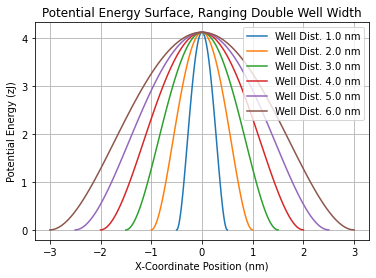

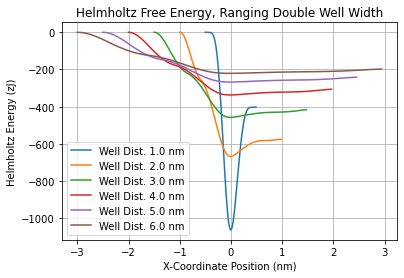

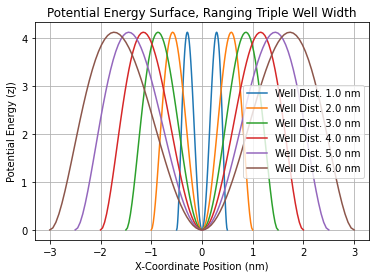

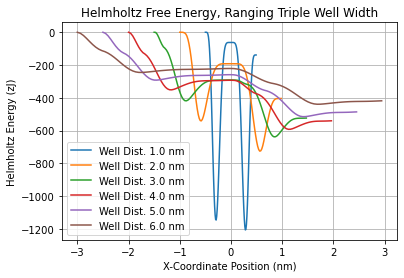

In [34]:
plt.figure()
for i in double_dict.keys():
    plt.plot(double_dict[i]['coords'],double_dict[i]['potential'],\
             label=f'Well Dist. {round(i*2,2)} nm')
plt.legend()
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Potential Energy (zJ)')
plt.title('Potential Energy Surface, Ranging Double Well Width')
plt.show()

plt.figure()
for i in double_dict.keys():
    plt.plot(double_dict[i]['coords'][:-1],\
             np.cumsum(double_dict[i]['free_energy']),\
             label=f'Well Dist. {round(i*2,2)} nm')
plt.legend()
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Helmholtz Energy (zJ)')
plt.title('Helmholtz Free Energy, Ranging Double Well Width')
plt.show()

plt.figure()
for i in triple_dict.keys():
    plt.plot(triple_dict[i]['coords'],triple_dict[i]['potential'],\
             label=f'Well Dist. {round(i*2,2)} nm')
plt.legend()
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Potential Energy (zJ)')
plt.title('Potential Energy Surface, Ranging Triple Well Width')
plt.show()

plt.figure()
for i in triple_dict.keys():
    plt.plot(triple_dict[i]['coords'][:-1],\
             np.cumsum(triple_dict[i]['free_energy']),\
             label=f'Well Dist. {round(i*2,2)} nm')
plt.legend()
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Helmholtz Energy (zJ)')
plt.title('Helmholtz Free Energy, Ranging Triple Well Width')
plt.show()

### Varying Well Height and its Effect on Helmholtz Free Energy

In [39]:
#TEST HEIGHT OF WELLS
double_dict_height = {}
triple_dict_height = {}
for height in np.linspace(0.2,1,5):
    run_calc_double = UWHAM_FreeEnergy(lower_range=-1.0,upper_range=1.0,\
                                well_type='double',n_bins=100,\
                                well_width=1,well_height=kB*T*height,\
                                friction_const=0.1,temperature=T,timestep_size=1e-4)
    run_calc_double.run_umbrella_sim_full(1000)
    free_energy_double = run_calc_double.helmholtz_energy(-1.0,1.0)
    double_dict_height[height]={'coords':run_calc_double.x_range,\
                        'free_energy':free_energy_double,\
                        'potential':np.array([run_calc_double.double_well_potential(x) \
                                               for x in run_calc_double.x_range])}
    print(f'Completed double, height {height}*kB*T')
    
    run_calc_triple = UWHAM_FreeEnergy(lower_range=-1.0,upper_range=1.0,\
                                well_type='triple',n_bins=100,\
                                well_width=1,well_height=kB*T*height,\
                                friction_const=0.1,temperature=T,timestep_size=1e-4)
    run_calc_triple.run_umbrella_sim_full(1000)
    free_energy_triple = run_calc_triple.helmholtz_energy(-1.0,1.0)
    triple_dict_height[height]={'coords':run_calc_triple.x_range,\
                        'free_energy':free_energy_triple,
                        'potential':np.array([run_calc_triple.triple_well_potential(x) \
                                               for x in run_calc_triple.x_range])}
    print(f'Completed triple, height {height}*kB*T')

Completed double, height 0.2*kB*T
Completed triple, height 0.2*kB*T
Completed double, height 0.4*kB*T
Completed triple, height 0.4*kB*T
Completed double, height 0.6000000000000001*kB*T
Completed triple, height 0.6000000000000001*kB*T
Completed double, height 0.8*kB*T
Completed triple, height 0.8*kB*T
Completed double, height 1.0*kB*T
Completed triple, height 1.0*kB*T


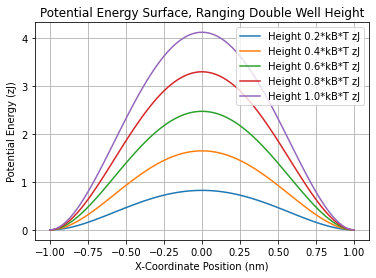

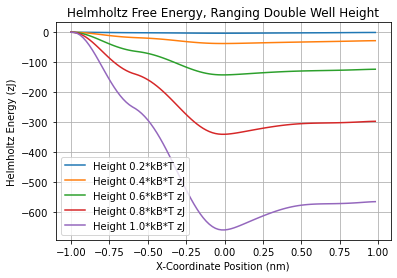

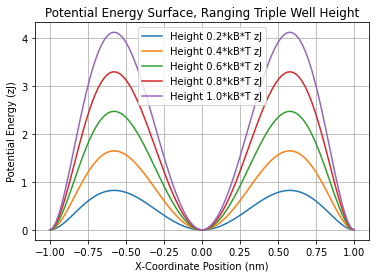

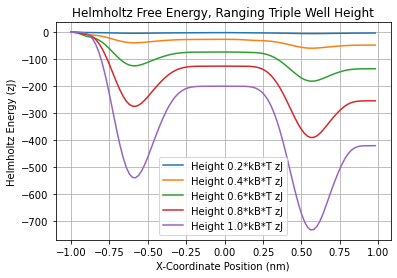

In [41]:
plt.figure()
for i in double_dict_height.keys():
    plt.plot(double_dict_height[i]['coords'],double_dict_height[i]['potential'],\
             label=f'Height {round(i,2)}*kB*T zJ')
plt.legend()
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Potential Energy (zJ)')
plt.title('Potential Energy Surface, Ranging Double Well Height')
plt.show()

plt.figure()
for i in double_dict_height.keys():
    plt.plot(double_dict_height[i]['coords'][:-1],\
             np.cumsum(double_dict_height[i]['free_energy']),\
             label=f'Height {round(i,2)}*kB*T zJ')
plt.legend()
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Helmholtz Energy (zJ)')
plt.title('Helmholtz Free Energy, Ranging Double Well Height')
plt.show()

plt.figure()
for i in triple_dict_height.keys():
    plt.plot(triple_dict_height[i]['coords'],triple_dict_height[i]['potential'],\
             label=f'Height {round(i,2)}*kB*T zJ')
plt.legend()
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Potential Energy (zJ)')
plt.title('Potential Energy Surface, Ranging Triple Well Height')
plt.show()

plt.figure()
for i in triple_dict_height.keys():
    plt.plot(triple_dict_height[i]['coords'][:-1],\
             np.cumsum(triple_dict_height[i]['free_energy']),\
             label=f'Height {round(i,2)}*kB*T zJ')
plt.legend()
plt.grid()
plt.xlabel('X-Coordinate Position (nm)')
plt.ylabel('Helmholtz Energy (zJ)')
plt.title('Helmholtz Free Energy, Ranging Triple Well Height')
plt.show()

### Computing Free Energies With Simultaneous Changes in Height and Width (Double Well)

In [44]:
#TEST DISTANCE BETWEEN WELLS AND HEIGHT SIMULTANEOUSLY
double_var = []
triple_var = []
for height in np.linspace(0.05,1,20):
    for width in np.linspace(0.1,3,30):
        ### RUN DOUBLE ###
        run_calc_double = UWHAM_FreeEnergy(lower_range=-width,upper_range=width,\
                                    well_type='double',n_bins=100,\
                                    well_width=width,well_height=kB*T*height,\
                                    friction_const=0.1,temperature=T,timestep_size=1e-4)
        run_calc_double.run_umbrella_sim_full(400)
        free_energy_double = run_calc_double.helmholtz_energy(-width,width)
        fe_sum_double = np.cumsum(free_energy_double)
        new_var_double = [width,height,fe_sum_double[-1]-fe_sum_double[0]]
        double_var.append(new_var_double)
        print(f'Completed double, {new_var_double}')

        ### RUN TRIPLE ###
        run_calc_triple = UWHAM_FreeEnergy(lower_range=-width,upper_range=width,\
                                    well_type='triple',n_bins=100,\
                                    well_width=1,well_height=kB*T*height,\
                                    friction_const=0.1,temperature=T,timestep_size=1e-4)
        run_calc_triple.run_umbrella_sim_full(400)
        free_energy_triple = run_calc_triple.helmholtz_energy(-width,width)
        fe_sum_triple = np.cumsum(free_energy_triple)
        new_var_triple = [width,height,fe_sum_triple[-1]-fe_sum_triple[0]]
        triple_var.append(new_var_triple)
        print(f'Completed triple, {new_var_triple}')

Completed double, [0.1, 0.05, -0.009968808838586418]
Completed triple, [0.1, 0.05, -0.0013700731392908175]
Completed double, [0.2, 0.05, -0.004286783761942295]
Completed triple, [0.2, 0.05, -0.033149612867377595]
Completed double, [0.3, 0.05, -0.0020828787823161145]
Completed triple, [0.3, 0.05, -0.15504858105849495]
Completed double, [0.4, 0.05, -0.0011772998809321455]
Completed triple, [0.4, 0.05, -0.2936674135254651]
Completed double, [0.5, 0.05, -0.0007545192235343433]
Completed triple, [0.5, 0.05, -0.22514406335837508]
Completed double, [0.6, 0.05, -0.0005199642416690158]
Completed triple, [0.6, 0.05, 0.06836842258775173]
Completed double, [0.7, 0.05, -0.000376537094824489]
Completed triple, [0.7, 0.05, 0.2263882629598656]
Completed double, [0.7999999999999999, 0.05, -0.0002913064333949235]
Completed triple, [0.7999999999999999, 0.05, 0.18804367370118463]
Completed double, [0.8999999999999999, 0.05, -0.00022952192584701597]
Completed triple, [0.8999999999999999, 0.05, 0.3300762631

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:174: RuntimeWarning: overflow encountered in exp
  energy_window[i,:,j]=np.exp((self.kB*self.temp)*0.5*force_init[j]*\


Completed triple, [1.5, 0.05, nan]
Completed double, [1.5999999999999999, 0.05, -7.256095356430271e-05]


/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  force_window[i]=(force_window[0]*K_force_window)**-1
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:187: RuntimeWarning: invalid value encountered in multiply
  diff=np.linalg.norm(np.log(force_window*force_window_update))
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:188: RuntimeWarning: invalid value encountered in true_divide
  force_window = force_window_update[0]/force_window_update


Completed triple, [1.5999999999999999, 0.05, nan]
Completed double, [1.7, 0.05, -6.411689978301087e-05]
Completed triple, [1.7, 0.05, nan]
Completed double, [1.8, 0.05, -5.704241624961872e-05]
Completed triple, [1.8, 0.05, nan]
Completed double, [1.9, 0.05, -5.116861936883604e-05]
Completed triple, [1.9, 0.05, nan]
Completed double, [2.0, 0.05, -4.6322626430176945e-05]
Completed triple, [2.0, 0.05, nan]
Completed double, [2.0999999999999996, 0.05, -4.179833296181164e-05]
Completed triple, [2.0999999999999996, 0.05, nan]
Completed double, [2.1999999999999997, 0.05, -3.830343680615993e-05]
Completed triple, [2.1999999999999997, 0.05, nan]
Completed double, [2.3, 0.05, -3.4876360708336595e-05]
Completed triple, [2.3, 0.05, nan]
Completed double, [2.4, 0.05, -3.211300819742402e-05]
Completed triple, [2.4, 0.05, nan]
Completed double, [2.5, 0.05, -2.966501506388179e-05]
Completed triple, [2.5, 0.05, nan]
Completed double, [2.6, 0.05, -2.7358669170268057e-05]
Completed triple, [2.6, 0.05, na

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:185: RuntimeWarning: overflow encountered in double_scalars
  force_window[i]=(force_window[0]*K_force_window)**-1
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:187: RuntimeWarning: divide by zero encountered in log
  diff=np.linalg.norm(np.log(force_window*force_window_update))
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:190: RuntimeWarning: divide by zero encountered in log
  FE_conv_li.append(np.log(force_window)/(self.kB*self.temp))
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:197: RuntimeWarning: divide by zero encountered in log
  self.final_free_energy = np.log(force_window)/(self.kB*self.temp)


Completed triple, [1.3, 0.15, -inf]
Completed double, [1.4, 0.15, -0.06872062734590366]
Completed triple, [1.4, 0.15, nan]
Completed double, [1.5, 0.15, -0.05994617006979182]
Completed triple, [1.5, 0.15, nan]
Completed double, [1.5999999999999999, 0.15, -0.052870575979536934]
Completed triple, [1.5999999999999999, 0.15, nan]
Completed double, [1.7, 0.15, -0.046824263356859804]
Completed triple, [1.7, 0.15, nan]
Completed double, [1.8, 0.15, -0.04171370494181089]
Completed triple, [1.8, 0.15, nan]
Completed double, [1.9, 0.15, -0.03734634166701685]
Completed triple, [1.9, 0.15, nan]
Completed double, [2.0, 0.15, -0.033704927837266085]
Completed triple, [2.0, 0.15, nan]
Completed double, [2.0999999999999996, 0.15, -0.030640631326705556]
Completed triple, [2.0999999999999996, 0.15, nan]
Completed double, [2.1999999999999997, 0.15, -0.027863847316007218]
Completed triple, [2.1999999999999997, 0.15, nan]
Completed double, [2.3, 0.15, -0.025482416687990873]
Completed triple, [2.3, 0.15, nan

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:38: RuntimeWarning: overflow encountered in double_scalars
  (x**2 - self.well_width**2)**2 * (x**2)
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:42: RuntimeWarning: overflow encountered in double_scalars
  (6*(x**5) - 8*(self.well_width**2 * x**3) + 2*(self.well_width**4 * x))
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:42: RuntimeWarning: invalid value encountered in double_scalars
  (6*(x**5) - 8*(self.well_width**2 * x**3) + 2*(self.well_width**4 * x))
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:37: RuntimeWarning: overflow encountered in double_scalars
  return (27*self.well_height/(4 * self.well_width**6))*\
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:174: RuntimeWarning: overflow encountered in multiply
  energy_window[i,:,j]=np.exp((self.kB*self.temp)*0.5*force_init[j]*\
/Users/meschw04/Documents/UC_MEN

Completed triple, [3.0, 0.2, nan]
Completed double, [0.1, 0.25, -5.8535040806647025]
Completed triple, [0.1, 0.25, -0.196934406106297]
Completed double, [0.2, 0.25, -6.369754388071652]
Completed triple, [0.2, 0.25, -4.805246812735646]
Completed double, [0.3, 0.25, -11.009273479687335]
Completed triple, [0.3, 0.25, -20.919329605256923]
Completed double, [0.4, 0.25, -11.312394188908897]
Completed triple, [0.4, 0.25, -35.498189612893]
Completed double, [0.5, 0.25, -8.929088948815346]
Completed triple, [0.5, 0.25, -30.870051275081412]
Completed double, [0.6, 0.25, -6.7579390801019095]
Completed triple, [0.6, 0.25, 4.768141356384024]
Completed double, [0.7, 0.25, -5.232966753516963]
Completed triple, [0.7, 0.25, 45.57670242851242]
Completed double, [0.7999999999999999, 0.25, -4.1159272099706135]
Completed triple, [0.7999999999999999, 0.25, 19.52604822135014]
Completed double, [0.8999999999999999, 0.25, -3.3189005861033682]
Completed triple, [0.8999999999999999, 0.25, 50.509738230629914]
Com

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:41: RuntimeWarning: overflow encountered in double_scalars
  return (27*self.well_height/(4 * self.well_width**6))*\


Completed triple, [3.0, 0.3, nan]
Completed double, [0.1, 0.35, -17.571213325038126]
Completed triple, [0.1, 0.35, -0.5518919523857022]
Completed double, [0.2, 0.35, -11.737893067587898]
Completed triple, [0.2, 0.35, -14.051732383745493]
Completed double, [0.3, 0.35, -24.860376916226627]
Completed triple, [0.3, 0.35, -55.50683290324391]
Completed double, [0.4, 0.35, -32.953188642866934]
Completed triple, [0.4, 0.35, -89.88570276946795]
Completed double, [0.5, 0.35, -34.474218469065484]
Completed triple, [0.5, 0.35, -90.02916906540207]
Completed double, [0.6, 0.35, -31.12559959593472]
Completed triple, [0.6, 0.35, 10.964699514779035]
Completed double, [0.7, 0.35, -26.165244333900123]
Completed triple, [0.7, 0.35, 149.73052880407005]
Completed double, [0.7999999999999999, 0.35, -21.7052007391753]
Completed triple, [0.7999999999999999, 0.35, 56.891048872034354]
Completed double, [0.8999999999999999, 0.35, -18.263425601218923]
Completed triple, [0.8999999999999999, 0.35, 141.53400376666892

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:182: RuntimeWarning: divide by zero encountered in reciprocal
  denominator = np.einsum('ilj,j->il',energy_window,mult_factor)**-1


Completed triple, [1.2, 0.39999999999999997, nan]
Completed double, [1.3, 0.39999999999999997, -19.17454064607785]
Completed triple, [1.3, 0.39999999999999997, nan]
Completed double, [1.4, 0.39999999999999997, -17.1174026197669]
Completed triple, [1.4, 0.39999999999999997, nan]
Completed double, [1.5, 0.39999999999999997, -15.475145114808784]
Completed triple, [1.5, 0.39999999999999997, nan]
Completed double, [1.5999999999999999, 0.39999999999999997, -13.89922304450335]
Completed triple, [1.5999999999999999, 0.39999999999999997, nan]
Completed double, [1.7, 0.39999999999999997, -12.682115469085579]
Completed triple, [1.7, 0.39999999999999997, nan]
Completed double, [1.8, 0.39999999999999997, -11.569628323307677]
Completed triple, [1.8, 0.39999999999999997, nan]
Completed double, [1.9, 0.39999999999999997, -10.590277163615886]
Completed triple, [1.9, 0.39999999999999997, nan]
Completed double, [2.0, 0.39999999999999997, -9.687471045391966]
Completed triple, [2.0, 0.39999999999999997, na

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:182: RuntimeWarning: overflow encountered in reciprocal
  denominator = np.einsum('ilj,j->il',energy_window,mult_factor)**-1


Completed triple, [1.2, 0.44999999999999996, nan]
Completed double, [1.3, 0.44999999999999996, -31.864280925355544]
Completed triple, [1.3, 0.44999999999999996, nan]
Completed double, [1.4, 0.44999999999999996, -28.61044337963203]
Completed triple, [1.4, 0.44999999999999996, nan]
Completed double, [1.5, 0.44999999999999996, -25.97526147913385]
Completed triple, [1.5, 0.44999999999999996, nan]
Completed double, [1.5999999999999999, 0.44999999999999996, -23.76490778538649]
Completed triple, [1.5999999999999999, 0.44999999999999996, nan]
Completed double, [1.7, 0.44999999999999996, -21.668920337208572]
Completed triple, [1.7, 0.44999999999999996, nan]
Completed double, [1.8, 0.44999999999999996, -19.83800293449294]
Completed triple, [1.8, 0.44999999999999996, nan]
Completed double, [1.9, 0.44999999999999996, -18.37016113231087]
Completed triple, [1.9, 0.44999999999999996, nan]
Completed double, [2.0, 0.44999999999999996, -17.00401423452792]
Completed triple, [2.0, 0.44999999999999996, nan

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:110: RuntimeWarning: overflow encountered in double_scalars
  next_pos = u_trajectory_li[-1]-((F_eq(u_trajectory_li[-1])/self.gamma)+\


Completed triple, [2.6999999999999997, 0.49999999999999994, nan]
Completed double, [2.8, 0.49999999999999994, -16.4158841400868]
Completed triple, [2.8, 0.49999999999999994, nan]
Completed double, [2.9, 0.49999999999999994, -15.522120375354458]
Completed triple, [2.9, 0.49999999999999994, nan]
Completed double, [3.0, 0.49999999999999994, -14.745501313495634]
Completed triple, [3.0, 0.49999999999999994, nan]
Completed double, [0.1, 0.5499999999999999, -132.59003207748162]
Completed triple, [0.1, 0.5499999999999999, -2.3593310796363354]
Completed double, [0.2, 0.5499999999999999, -25.772336825570598]
Completed triple, [0.2, 0.5499999999999999, -55.79092575059821]
Completed double, [0.3, 0.5499999999999999, -55.06258254802696]
Completed triple, [0.3, 0.5499999999999999, -208.21305565331141]
Completed double, [0.4, 0.5499999999999999, -92.10497794914765]
Completed triple, [0.4, 0.5499999999999999, -378.01583878858503]
Completed double, [0.5, 0.5499999999999999, -110.67813412531743]
Complet

Completed double, [1.0999999999999999, 0.65, -147.34627214636143]
Completed triple, [1.0999999999999999, 0.65, -1292.1754464789522]
Completed double, [1.2, 0.65, -134.58733137947237]
Completed triple, [1.2, 0.65, nan]
Completed double, [1.3, 0.65, -123.3101074373314]
Completed triple, [1.3, 0.65, nan]
Completed double, [1.4, 0.65, -112.6392876541081]
Completed triple, [1.4, 0.65, nan]
Completed double, [1.5, 0.65, -104.20187174020003]
Completed triple, [1.5, 0.65, nan]
Completed double, [1.5999999999999999, 0.65, -96.47553308384805]
Completed triple, [1.5999999999999999, 0.65, nan]
Completed double, [1.7, 0.65, -90.1605669091543]
Completed triple, [1.7, 0.65, nan]
Completed double, [1.8, 0.65, -83.92233037031424]
Completed triple, [1.8, 0.65, nan]
Completed double, [1.9, 0.65, -78.60110130030324]
Completed triple, [1.9, 0.65, nan]
Completed double, [2.0, 0.65, -74.06400034974162]
Completed triple, [2.0, 0.65, nan]
Completed double, [2.0999999999999996, 0.65, -69.31214977350507]
Complet

Completed double, [0.5, 0.7999999999999999, -250.2327441707741]
Completed triple, [0.5, 0.7999999999999999, -1360.395830883212]
Completed double, [0.6, 0.7999999999999999, -283.76000257700764]
Completed triple, [0.6, 0.7999999999999999, 335.0286143711677]
Completed double, [0.7, 0.7999999999999999, -333.04437964771427]
Completed triple, [0.7, 0.7999999999999999, 2362.2014813399383]
Completed double, [0.7999999999999999, 0.7999999999999999, -337.52276688659555]
Completed triple, [0.7999999999999999, 0.7999999999999999, 1325.2875492233454]
Completed double, [0.8999999999999999, 0.7999999999999999, -323.7454118514921]
Completed triple, [0.8999999999999999, 0.7999999999999999, 736.5370433545762]
Completed double, [0.9999999999999999, 0.7999999999999999, -300.80997499647975]
Completed triple, [0.9999999999999999, 0.7999999999999999, -279.03656670953325]
Completed double, [1.0999999999999999, 0.7999999999999999, -277.1375013088422]
Completed triple, [1.0999999999999999, 0.7999999999999999, -

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:30: RuntimeWarning: overflow encountered in double_scalars
  (x**2 - self.well_width**2)**2
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:34: RuntimeWarning: overflow encountered in double_scalars
  (x**2 - self.well_width**2)
/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:110: RuntimeWarning: invalid value encountered in double_scalars
  next_pos = u_trajectory_li[-1]-((F_eq(u_trajectory_li[-1])/self.gamma)+\


Completed double, [0.1, 0.9, nan]
Completed triple, [0.1, 0.9, -11.273686709437944]
Completed double, [0.2, 0.9, -69.30321452114086]
Completed triple, [0.2, 0.9, -244.46487737642997]
Completed double, [0.3, 0.9, -110.17608730239814]
Completed triple, [0.3, 0.9, -1107.627393170424]
Completed double, [0.4, 0.9, -216.55249346864846]
Completed triple, [0.4, 0.9, -2217.2465682378956]
Completed double, [0.5, 0.9, -327.65842052016876]
Completed triple, [0.5, 0.9, -2045.027404327694]
Completed double, [0.6, 0.9, -366.3762740258093]
Completed triple, [0.6, 0.9, 515.9906072381474]
Completed double, [0.7, 0.9, -431.7379316891746]
Completed triple, [0.7, 0.9, 3447.948378717113]
Completed double, [0.7999999999999999, 0.9, -446.3214758935344]
Completed triple, [0.7999999999999999, 0.9, 1979.2999193794267]
Completed double, [0.8999999999999999, 0.9, -439.94926505264027]
Completed triple, [0.8999999999999999, 0.9, 813.5518354731156]
Completed double, [0.9999999999999999, 0.9, -421.9310606203653]
Compl

/Users/meschw04/Documents/UC_MENG_35500/Term_Project/uwham_umbrella.py:33: RuntimeWarning: overflow encountered in double_scalars
  return (4*self.well_height*x/(self.well_width**4))*\


Completed double, [0.1, 0.95, nan]
Completed triple, [0.1, 0.95, -13.293772575874371]
Completed double, [0.2, 0.95, -78.75240666088844]
Completed triple, [0.2, 0.95, -288.5853280291179]
Completed double, [0.3, 0.95, -120.17724833006928]
Completed triple, [0.3, 0.95, -1336.055235406948]
Completed double, [0.4, 0.95, -220.09396781069688]
Completed triple, [0.4, 0.95, -2659.4568229797032]
Completed double, [0.5, 0.95, -358.66450934631615]
Completed triple, [0.5, 0.95, -2474.3977042234806]
Completed double, [0.6, 0.95, -418.99365358884626]
Completed triple, [0.6, 0.95, 626.4655725333832]
Completed double, [0.7, 0.95, -477.8967423618688]
Completed triple, [0.7, 0.95, 4095.196220865768]
Completed double, [0.7999999999999999, 0.95, -515.7084815339643]
Completed triple, [0.7999999999999999, 0.95, 2401.035575224379]
Completed double, [0.8999999999999999, 0.95, -506.076079661055]
Completed triple, [0.8999999999999999, 0.95, 666.9197086953857]
Completed double, [0.9999999999999999, 0.95, -500.293

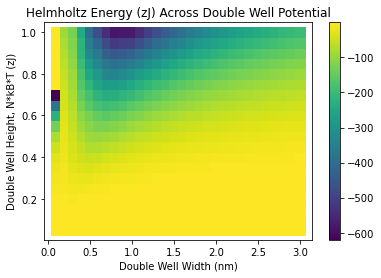

In [88]:
plt.figure()
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(np.array(double_var).T[0],np.array(double_var).T[1],\
            c=np.nan_to_num(np.array(double_var)).T[2],\
            vmin=min(np.array(double_var).T[2]), \
            vmax=max(np.array(double_var).T[2]),s=100,marker='s')
plt.colorbar()
plt.xlabel('Double Well Width (nm)')
plt.ylabel('Double Well Height, N*kB*T (zJ)')
plt.title('Helmholtz Energy (zJ) Across Double Well Potential')
plt.show()

### Computing Free Energies With Simultaneous Changes in Height and Width (Triple Well)

In [75]:
#TEST DISTANCE BETWEEN WELLS AND HEIGHT SIMULTANEOUSLY
triple_var = []
for height in np.linspace(0.05,1,20):
    for width in np.linspace(0.05,1,20):
        ### RUN TRIPLE ###
        run_calc_triple = UWHAM_FreeEnergy(lower_range=-width,upper_range=width,\
                                    well_type='triple',n_bins=100,\
                                    well_width=1,well_height=kB*T*height,\
                                    friction_const=0.1,temperature=T,timestep_size=1e-4)
        run_calc_triple.run_umbrella_sim_full(400)
        free_energy_triple = run_calc_triple.helmholtz_energy(-width,width)
        fe_sum_triple = np.cumsum(free_energy_triple)
        new_var_triple = [width,height,fe_sum_triple[-1]-fe_sum_triple[0]]
        triple_var.append(new_var_triple)
        print(f'Completed triple, {new_var_triple}')

Completed triple, [0.05, 0.05, -6.683841111856192e-05]
Completed triple, [0.1, 0.05, -0.0013672349479291143]
Completed triple, [0.15, 0.05, -0.009264706616473306]
Completed triple, [0.2, 0.05, -0.03318643670469418]
Completed triple, [0.25, 0.05, -0.08266049703690453]
Completed triple, [0.3, 0.05, -0.15282834885723073]
Completed triple, [0.35, 0.05, -0.23458056342107195]
Completed triple, [0.39999999999999997, 0.05, -0.2931505584104256]
Completed triple, [0.44999999999999996, 0.05, -0.29307203098501594]
Completed triple, [0.49999999999999994, 0.05, -0.22245511298033518]
Completed triple, [0.5499999999999999, 0.05, -0.0862841383714699]
Completed triple, [0.6, 0.05, 0.06840756834627319]
Completed triple, [0.65, 0.05, 0.18510501487152137]
Completed triple, [0.7, 0.05, 0.22438392025452003]
Completed triple, [0.75, 0.05, 0.2018579212188894]
Completed triple, [0.7999999999999999, 0.05, 0.18631803974201308]
Completed triple, [0.85, 0.05, 0.24003478915583462]
Completed triple, [0.9, 0.05, 0.332

Completed triple, [0.49999999999999994, 0.39999999999999997, -138.87421147989048]
Completed triple, [0.5499999999999999, 0.39999999999999997, -94.13653744885312]
Completed triple, [0.6, 0.39999999999999997, 20.787295681827988]
Completed triple, [0.65, 0.39999999999999997, 162.9461618142515]
Completed triple, [0.7, 0.39999999999999997, 238.01461175060027]
Completed triple, [0.75, 0.39999999999999997, 208.2075103681352]
Completed triple, [0.7999999999999999, 0.39999999999999997, 96.53717212527222]
Completed triple, [0.85, 0.39999999999999997, 86.4556328745647]
Completed triple, [0.9, 0.39999999999999997, 201.88040596768445]
Completed triple, [0.95, 0.39999999999999997, 134.3838616801923]
Completed triple, [1.0, 0.39999999999999997, -48.1930487151802]
Completed triple, [0.05, 0.44999999999999996, -0.03883985156258509]
Completed triple, [0.1, 0.44999999999999996, -1.2350706904726179]
Completed triple, [0.15, 0.44999999999999996, -8.685632711312223]
Completed triple, [0.2, 0.449999999999999

Completed triple, [0.15, 0.75, -42.569456876418]
Completed triple, [0.2, 0.75, -138.52696453127075]
Completed triple, [0.25, 0.75, -318.37909084037364]
Completed triple, [0.3, 0.75, -589.4455751547059]
Completed triple, [0.35, 0.75, -891.5504749444876]
Completed triple, [0.39999999999999997, 0.75, -1147.5789327116643]
Completed triple, [0.44999999999999996, 0.75, -1217.2216409738967]
Completed triple, [0.49999999999999994, 0.75, -1080.3353888487195]
Completed triple, [0.5499999999999999, 0.75, -655.1833530513888]
Completed triple, [0.6, 0.75, 263.87264793611666]
Completed triple, [0.65, 0.75, 1334.533863218319]
Completed triple, [0.7, 0.75, 1916.139208290681]
Completed triple, [0.75, 0.75, 1762.9185491952492]
Completed triple, [0.7999999999999999, 0.75, 1056.9984168042831]
Completed triple, [0.85, 0.75, 253.1691347414913]
Completed triple, [0.9, 0.75, 568.9184573236071]
Completed triple, [0.95, 0.75, 237.91874238363687]
Completed triple, [1.0, 0.75, -239.06544930281834]
Completed tripl

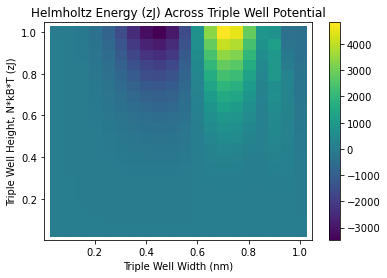

In [89]:
plt.figure()
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(np.array(triple_var).T[0],np.array(triple_var).T[1],\
            c=np.nan_to_num(np.array(triple_var)).T[2],\
            vmin=min(np.array(triple_var).T[2]), \
            vmax=max(np.array(triple_var).T[2]),s=140,marker='s')
plt.xlabel('Triple Well Width (nm)')
plt.ylabel('Triple Well Height, N*kB*T (zJ)')
plt.title('Helmholtz Energy (zJ) Across Triple Well Potential')
plt.colorbar()
plt.show()